In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [17]:
np.random.seed(42)


In [18]:
data = {
    'employee_id':range(1,251),
    'employee_name':np.random.choice([
        'Partha','Vikash','Rakesh','Shivani','Sonali','Alok'
    ],size=250),
    'designation':np.random.choice([
        'Executive','Sr Executive','Manager','Senior Manager','Vice President'
    ],size=232).tolist()+[np.nan]*18,
    'experience':np.random.choice([np.nan]*25+list(range(12,120)),size=250),
    'salary':np.random.randint(20000,60000,size=250)
}

In [19]:
df = pd.DataFrame(data)
df.head()

,employee_id,employee_name,designation,experience,salary
0,1,Shivani,Senior Manager,87.0,39262
1,2,Sonali,Manager,NaN,24432
2,3,Rakesh,Senior Manager,53.0,49721
3,4,Sonali,Manager,51.0,33568
4,5,Sonali,Sr Executive,60.0,34178


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_id    250 non-null    int64  
 1   employee_name  250 non-null    object 
 2   designation    232 non-null    object 
 3   experience     207 non-null    float64
 4   salary         250 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 8.9+ KB


In [21]:
df.isnull().sum()

employee_id       0
employee_name     0
designation      18
experience       43
salary            0
dtype: int64

In [22]:
df['designation'].fillna(df['designation'].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

employee_id       0
employee_name     0
designation       0
experience       43
salary            0
dtype: int64

In [24]:
df.head()

,employee_id,employee_name,designation,experience,salary
0,1,Shivani,Senior Manager,87.0,39262
1,2,Sonali,Manager,NaN,24432
2,3,Rakesh,Senior Manager,53.0,49721
3,4,Sonali,Manager,51.0,33568
4,5,Sonali,Sr Executive,60.0,34178


In [25]:
df['experience'].fillna(df['experience'].median(),inplace=True)

In [26]:
df.isnull().sum()

employee_id      0
employee_name    0
designation      0
experience       0
salary           0
dtype: int64

In [27]:
df.head()

,employee_id,employee_name,designation,experience,salary
0,1,Shivani,Senior Manager,87.0,39262
1,2,Sonali,Manager,68.0,24432
2,3,Rakesh,Senior Manager,53.0,49721
3,4,Sonali,Manager,51.0,33568
4,5,Sonali,Sr Executive,60.0,34178


In [28]:
df = df[['employee_id','designation','experience','salary']]
df.head()

,employee_id,designation,experience,salary
0,1,Senior Manager,87.0,39262
1,2,Manager,68.0,24432
2,3,Senior Manager,53.0,49721
3,4,Manager,51.0,33568
4,5,Sr Executive,60.0,34178


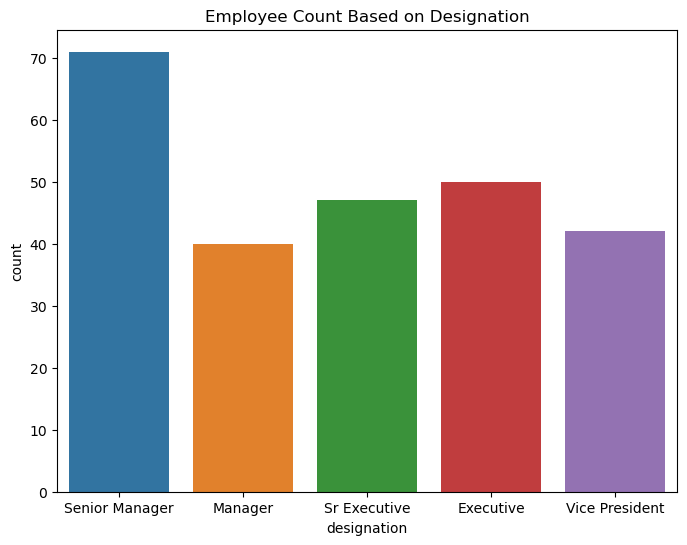

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='designation',data=df)
plt.title('Employee Count Based on Designation')
plt.show()

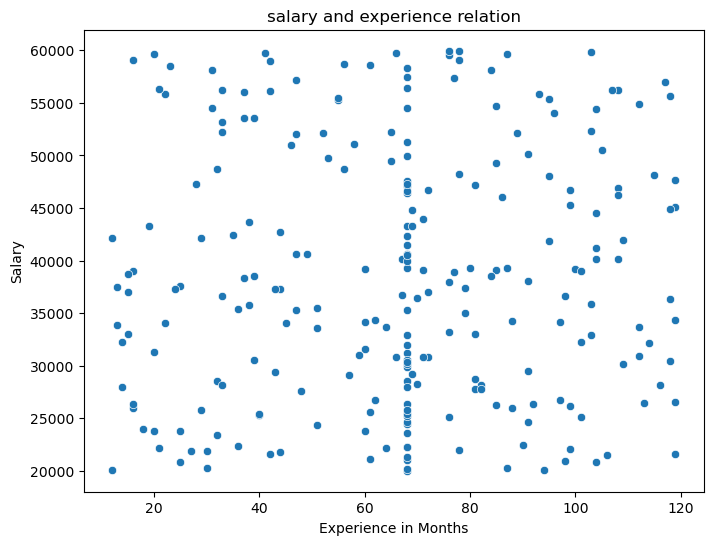

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='experience',y='salary',data=df)
plt.title('salary and experience relation')
plt.xlabel('Experience in Months')
plt.ylabel('Salary')
plt.show()

In [33]:
df = pd.get_dummies(df,columns=['designation'],prefix='designation',drop_first=True)
df.head()

,employee_id,experience,salary,designation_Manager,designation_Senior Manager,designation_Sr Executive,designation_Vice President
0,1,87.0,39262,0,1,0,0
1,2,68.0,24432,1,0,0,0
2,3,53.0,49721,0,1,0,0
3,4,51.0,33568,1,0,0,0
4,5,60.0,34178,0,0,1,0


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
column_to_scale = ['experience']
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

In [36]:
df.head()

,employee_id,experience,salary,designation_Manager,designation_Senior Manager,designation_Sr Executive,designation_Vice President
0,1,0.710700,39262,0,1,0,0
1,2,0.045644,24432,1,0,0,0
2,3,-0.479401,49721,0,1,0,0
3,4,-0.549407,33568,1,0,0,0
4,5,-0.234380,34178,0,0,1,0


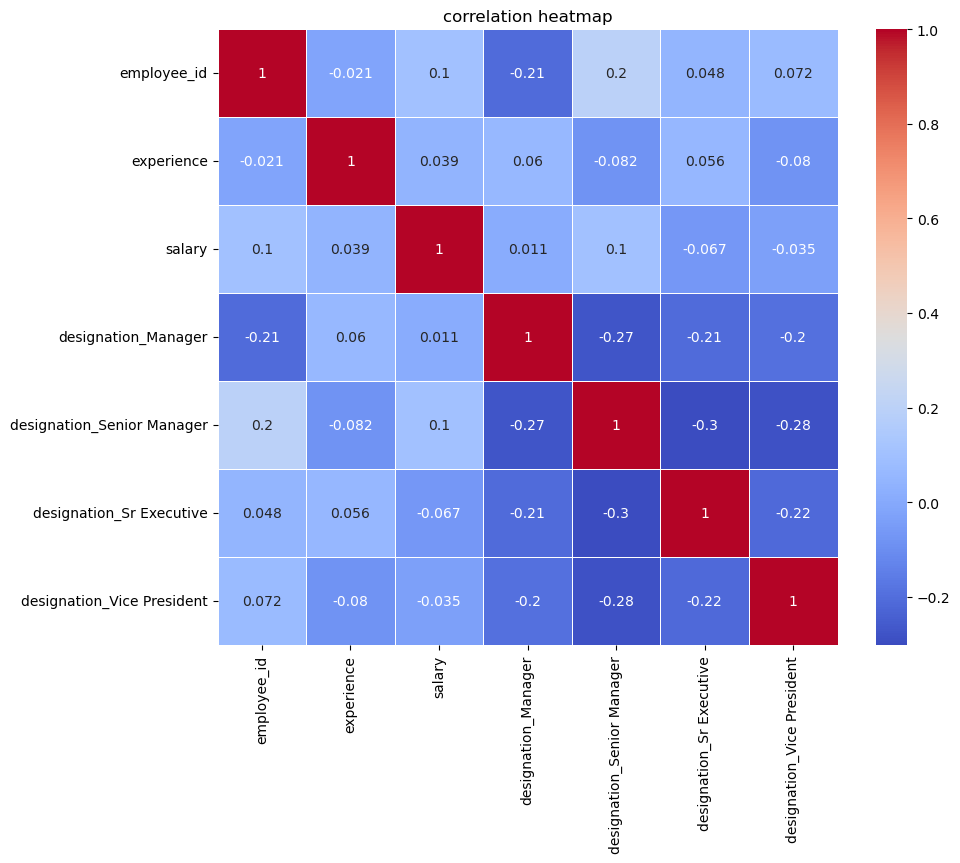

In [37]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix , annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correlation heatmap')
plt.show()

In [38]:
x = df.drop('salary',axis=1)
y = df['salary']

In [39]:
x.head()

,employee_id,experience,designation_Manager,designation_Senior Manager,designation_Sr Executive,designation_Vice President
0,1,0.710700,0,1,0,0
1,2,0.045644,1,0,0,0
2,3,-0.479401,0,1,0,0
3,4,-0.549407,1,0,0,0
4,5,-0.234380,0,0,1,0


In [40]:
y

0      39262
1      24432
2      49721
3      33568
4      34178
       ...  
245    56244
246    56185
247    21645
248    39256
249    55840
Name: salary, Length: 250, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
xtrain.shape

(200, 6)

In [43]:
xtest.shape

(50, 6)

In [44]:
ytrain.shape

(200,)

In [45]:
ytest.shape

(50,)

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
lr_model = LinearRegression()

In [48]:
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [49]:
ypred = lr_model.predict(xtest)

In [51]:
lr_model.score(xtest,ytest)

-0.05829251799942492

In [52]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [53]:
mse = mean_squared_error(ytest,ypred)
mse

146077688.69757614

In [54]:
rmse = mean_squared_error(ytest,ypred,squared=False)

In [55]:
rmse

12086.260327230095

In [56]:
mae = mean_absolute_error(ytest,ypred)
mae

10307.481798846671